<a href="https://colab.research.google.com/github/Snowy1013z/insurance_claim/blob/main/Master_file_(Final)_v3_(without_SMOTE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load Packages #
import os
import numpy as np
import pandas as pd

# Load google Drive #
from google.colab import drive
drive.mount('/content/drive')



# import os
# import numpy as np
# import pandas as pd

# # Load google Drive #
# from google.colab import drive
# drive.mount('/content/drive')

# # Set Working Directory #
# os.chdir("/content/drive/MyDrive/DSO530Public/data")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import root_mean_squared_error

pd.set_option("display.max_columns", None)

In [ ]:
from sklearn.linear_model import TweedieRegressor

from sklearn.metrics import mean_squared_error, make_scorer
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation

import xgboost as xgb

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns

from xgboost import XGBClassifier


## Read data

In [ ]:
train_data= pd.read_csv("/content/drive/MyDrive/DSO 530 Team/Code Notebooks/insurance_train.csv")
# train_data=pd.read_csv("insurance_train.csv")
print(train_data.shape)
train_data.head(5)

(37451, 28)


,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,X.11,X.12,X.13,X.14,X.15,X.16,X.17,X.18,X.19,X.20,X.21,X.22,X.23,X.24,X.25,X.26,X.27,X.28
0,34429,01/06/2017,01/06/2017,01/06/2018,29/08/1996,31/05/2016,0,1,1,1,1,1,0,573.07,0.0,0,0,0.00,3,0,0,1994,75,1360,12795.55,4,P,1040
1,5552,19/09/2016,19/09/2018,19/09/2019,30/04/1992,03/08/2010,0,3,1,1,1,0,0,299.19,0.0,0,0,0.00,3,0,0,2004,100,1896,15386.00,5,D,1165
2,47700,08/01/2003,08/01/2018,08/01/2019,23/03/1972,01/02/1998,1,20,2,2,1,0,0,257.66,0.0,0,2,0.13,3,0,0,2002,95,1390,16470.00,5,P,1235
3,25425,01/10/2015,01/10/2018,01/10/2019,05/03/1946,07/08/1964,0,8,2,3,1,0,0,288.70,0.0,0,1,0.00,3,0,0,2010,140,2497,27381.00,5,D,1984
4,4727,26/01/2017,26/01/2018,26/01/2019,25/04/1973,24/07/1998,0,9,1,1,1,0,0,741.16,0.0,0,3,1.08,3,0,0,1998,80,1969,36600.00,3,P,1702


## EDA

### Distributions of main columns

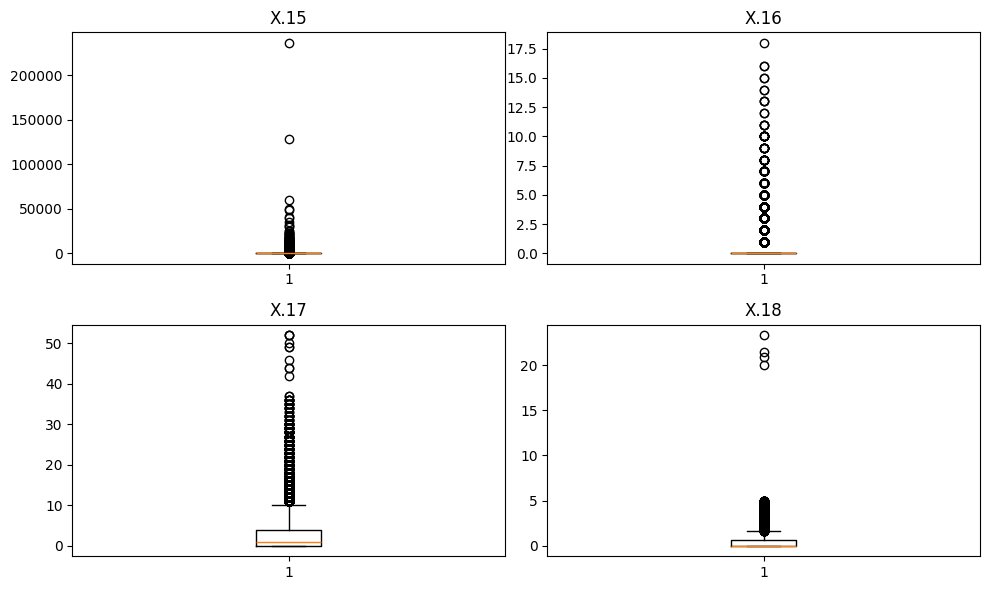

In [ ]:
# prompt: plot X.15, X.16,X.17 and X.18 in  seperate boxplot

import matplotlib.pyplot as plt

# Create the boxplots
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.boxplot(train_data['X.15'])
plt.title('X.15')

plt.subplot(2, 2, 2)
plt.boxplot(train_data['X.16'])
plt.title('X.16')

plt.subplot(2, 2, 3)
plt.boxplot(train_data['X.17'])
plt.title('X.17')

plt.subplot(2, 2, 4)
plt.boxplot(train_data['X.18'])
plt.title('X.18')

plt.tight_layout()
plt.show()


### Outlier Removal

In [ ]:
train_data['X.15_bucket'] = pd.cut(train_data['X.15'], bins=[-float('inf'), 0, 40000, 100000, float('inf')], labels=['0', '0-40000', '40000-100000', '>100000'])

train_data['X.16_bucket'] = pd.cut(train_data['X.16'], bins=[-float('inf'), 15, float('inf')], labels=['<=15', '>15'])

train_data['X.17_bucket'] = pd.cut(train_data['X.17'], bins=[-float('inf'), 40, float('inf')], labels=['<=40', '>40'])

train_data['X.18_bucket'] = pd.cut(train_data['X.18'], bins=[-float('inf'), 0, 10, float('inf')], labels=['0', '0-10', '>10'])

In [ ]:
# Count values in each bucket for X.15
bucket_counts_15 = train_data['X.15_bucket'].value_counts()
print("X.15 Buckets:")
print(bucket_counts_15)

# Count values in each bucket for X.16
bucket_counts_16 = train_data['X.16_bucket'].value_counts()
print("\nX.16 Buckets:")
print(bucket_counts_16)

# Count values in each bucket for X.17
bucket_counts_17 = train_data['X.17_bucket'].value_counts()
print("\nX.17 Buckets:")
print(bucket_counts_17)

# Count values in each bucket for X.18
bucket_counts_18 = train_data['X.18_bucket'].value_counts()
print("\nX.18 Buckets:")
bucket_counts_18

X.15 Buckets:
X.15_bucket
0               33300
0-40000          4145
40000-100000        4
>100000             2
Name: count, dtype: int64

X.16 Buckets:
X.16_bucket
<=15    37448
>15         3
Name: count, dtype: int64

X.17 Buckets:
X.17_bucket
<=40    37441
>40        10
Name: count, dtype: int64

X.18 Buckets:


,count
X.18_bucket,
0,20017
0-10,17430
>10,4


In [ ]:
print(train_data.shape)

train_data = train_data[~(((train_data['X.15_bucket'] == '40000-100000') | (train_data['X.15_bucket'] == '>100000')) |
                         (train_data['X.16_bucket'] == '>15') |
                          (train_data['X.17_bucket'] == '>40') |
                         (train_data['X.18_bucket'] == '>10'))]

print(train_data.shape)


(37451, 32)
(37428, 32)


### Datetime conversion

In [ ]:
for col in ['X.2', 'X.3', 'X.4', 'X.5', 'X.6']:
    try:
        train_data[col] = pd.to_datetime(train_data[col], errors='coerce', dayfirst=True)
    except Exception as e:
        print(f"Could not convert column '{col}': {e}")


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37428 entries, 0 to 37450
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   X.1          37428 non-null  int64         
 1   X.2          37428 non-null  datetime64[ns]
 2   X.3          37428 non-null  datetime64[ns]
 3   X.4          37428 non-null  datetime64[ns]
 4   X.5          37428 non-null  datetime64[ns]
 5   X.6          37428 non-null  datetime64[ns]
 6   X.7          37428 non-null  int64         
 7   X.8          37428 non-null  int64         
 8   X.9          37428 non-null  int64         
 9   X.10         37428 non-null  int64         
 10  X.11         37428 non-null  int64         
 11  X.12         37428 non-null  int64         
 12  X.13         37428 non-null  int64         
 13  X.14         37428 non-null  float64       
 14  X.15         37428 non-null  float64       
 15  X.16         37428 non-null  int64         
 16  X.17     

### Handling missing values using XGBoost

<Axes: >

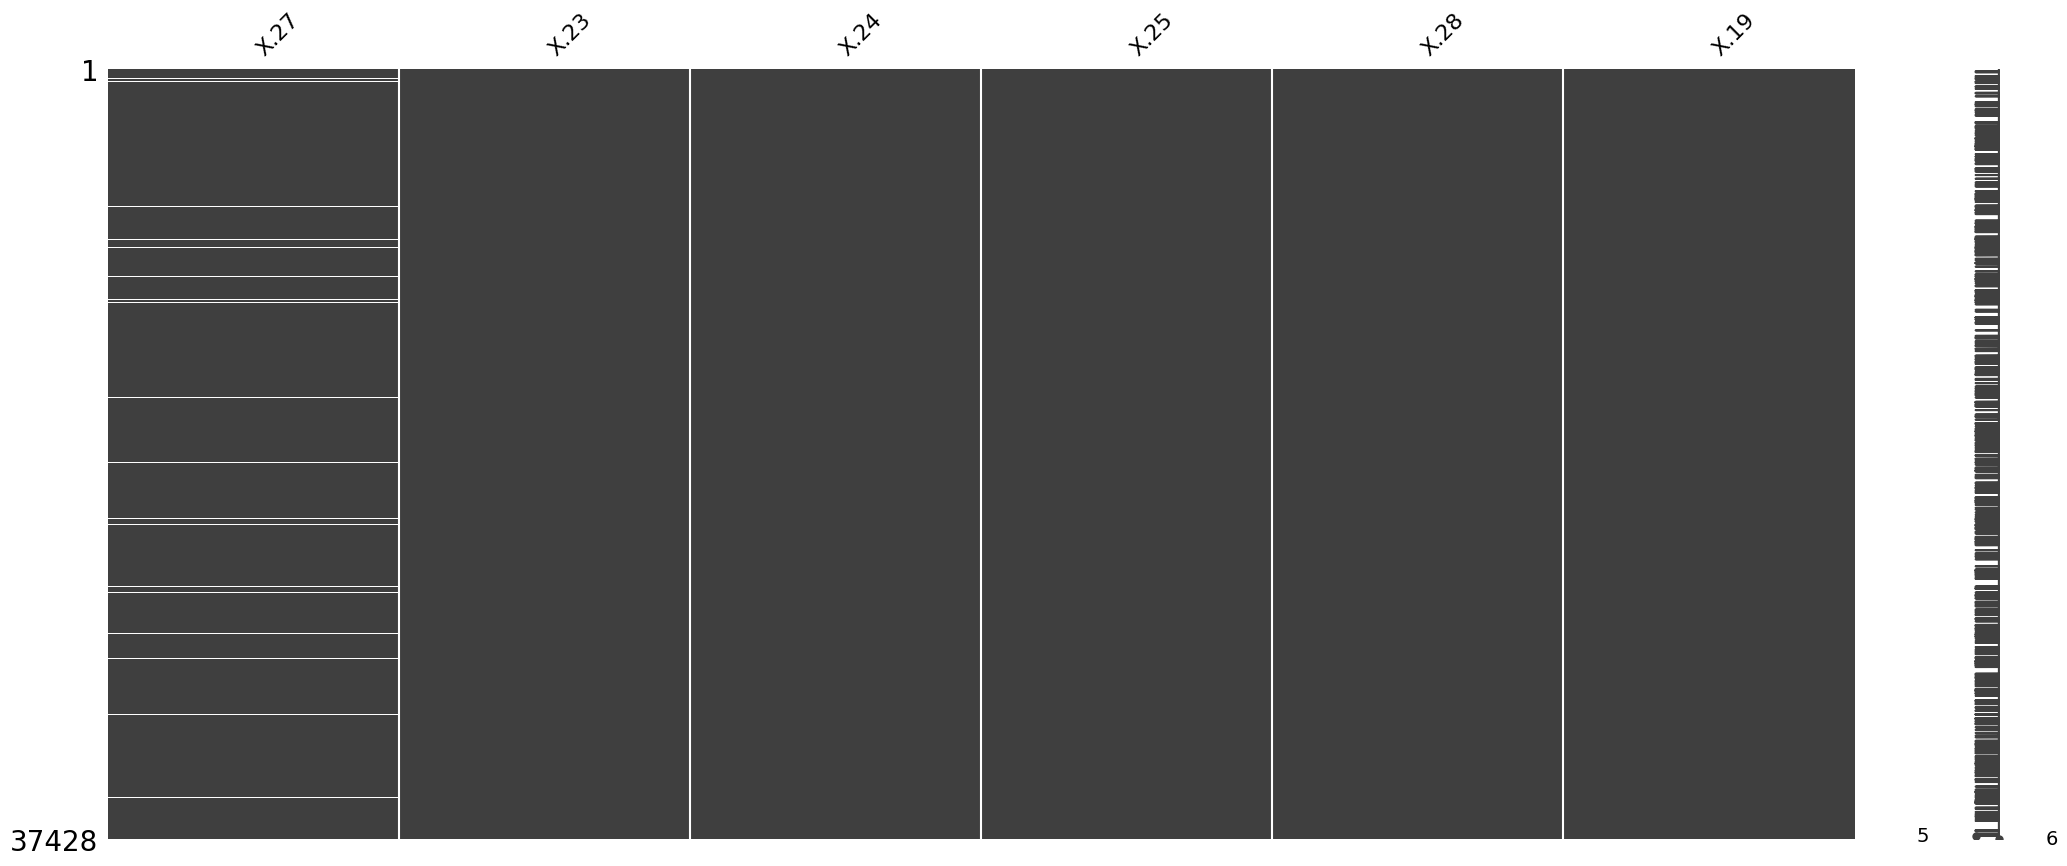

In [ ]:
import missingno as msno
msno.matrix(train_data[['X.27', 'X.23', 'X.24', 'X.25', 'X.28','X.19']])

XGboost

In [ ]:
train_data_temp=train_data.copy()

# Training data (non-null)
train_df = train_data_temp[train_data_temp['X.27'].notnull()]
test_df = train_data_temp[train_data_temp['X.27'].isnull()]

features = ['X.23', 'X.24', 'X.25', 'X.28','X.19']  # use vehicle attributes
X_train = train_df[features]
y_train = train_df['X.27']
X_test = test_df[features]


# Encode target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Train the model
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train, y_train_encoded)

# Predict
predicted_encoded = xgb_clf.predict(X_test)

# Decode the predictions back to original labels ('D' and 'P')
predicted_xgb = le.inverse_transform(predicted_encoded)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:49:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Predict on training data
y_pred_train_encoded = xgb_clf.predict(X_train)

# Accuracy and classification report using encoded labels
print("Train Accuracy:", accuracy_score(y_train_encoded, y_pred_train_encoded))
print("Classification Report:\n", classification_report(y_train_encoded, y_pred_train_encoded, target_names=le.classes_))


Train Accuracy: 0.9631328899144835
Classification Report:
               precision    recall  f1-score   support

           D       0.96      0.98      0.97     23056
           P       0.96      0.94      0.95     13779

    accuracy                           0.96     36835
   macro avg       0.96      0.96      0.96     36835
weighted avg       0.96      0.96      0.96     36835



In [ ]:
train_data_temp.loc[train_data_temp['X.27'].isnull(), 'X.27'] = predicted_xgb

In [ ]:
print(train_data['X.27'].value_counts(normalize=True))
print(train_data_temp['X.27'].value_counts(normalize=True))


X.27
D    0.625926
P    0.374074
Name: proportion, dtype: float64
X.27
D    0.616864
P    0.383136
Name: proportion, dtype: float64


In [ ]:
train_data_temp.head()

,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,X.11,X.12,X.13,X.14,X.15,X.16,X.17,X.18,X.19,X.20,X.21,X.22,X.23,X.24,X.25,X.26,X.27,X.28,X.15_bucket,X.16_bucket,X.17_bucket,X.18_bucket
0,34429,2017-06-01,2017-06-01,2018-06-01,1996-08-29,2016-05-31,0,1,1,1,1,1,0,573.07,0.0,0,0,0.00,3,0,0,1994,75,1360,12795.55,4,P,1040,0,<=15,<=40,0
1,5552,2016-09-19,2018-09-19,2019-09-19,1992-04-30,2010-08-03,0,3,1,1,1,0,0,299.19,0.0,0,0,0.00,3,0,0,2004,100,1896,15386.00,5,D,1165,0,<=15,<=40,0
2,47700,2003-01-08,2018-01-08,2019-01-08,1972-03-23,1998-02-01,1,20,2,2,1,0,0,257.66,0.0,0,2,0.13,3,0,0,2002,95,1390,16470.00,5,P,1235,0,<=15,<=40,0-10
3,25425,2015-10-01,2018-10-01,2019-10-01,1946-03-05,1964-08-07,0,8,2,3,1,0,0,288.70,0.0,0,1,0.00,3,0,0,2010,140,2497,27381.00,5,D,1984,0,<=15,<=40,0
4,4727,2017-01-26,2018-01-26,2019-01-26,1973-04-25,1998-07-24,0,9,1,1,1,0,0,741.16,0.0,0,3,1.08,3,0,0,1998,80,1969,36600.00,3,P,1702,0,<=15,<=40,0-10


### Feature Engineering:

In [ ]:
date_cols = ['X.2', 'X.3', 'X.4', 'X.5', 'X.6']
train_data_temp['age'] = (train_data_temp['X.3'] - train_data_temp['X.5']).dt.days // 365
train_data_temp['driver_experience'] = (train_data_temp['X.3'] - train_data_temp['X.6']).dt.days // 365
train_data_temp['Vehicle_age'] = (2019-train_data_temp['X.22'])
train_data_temp['insured_age'] = (train_data_temp['X.2'] - train_data_temp['X.5']).dt.days / 365
train_data_temp['license_years'] = (train_data_temp['X.2'] - train_data_temp['X.6']).dt.days / 365
train_data_temp['policy_duration'] = (train_data_temp['X.4'] - train_data_temp['X.2']).dt.days / 365
train_data_temp['years_since_last_renewal'] = (train_data_temp['X.2'] - train_data_temp['X.3']).dt.days / 365

In [ ]:
train_data_temp['Policies_Dropped'] = train_data_temp['X.10'] - train_data_temp['X.9']

### Label Mapping

In [ ]:
train_data_temp['X.7'] = train_data_temp['X.7'].replace({0: 'Agent', 1: 'Broker'})
train_data_temp['X.13'] = train_data_temp['X.13'].replace({0: 'Annual', 1: 'Half-Yearly'})
train_data_temp['X.19'] = train_data_temp['X.19'].replace({1: 'motorbikes', 2: 'vans',3: 'passenger_cars', 4: 'agricultural_vehicles'})
train_data_temp['X.20']=train_data_temp['X.20'].replace({0: 'Rural', 1: 'Urban'})
train_data_temp['X.21']=train_data_temp['X.21'].replace({1: 'Multiple_drivers', 0: 'Single_driver'})

In [ ]:
train_data_temp.head()

,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,X.11,X.12,X.13,X.14,X.15,X.16,X.17,X.18,X.19,X.20,X.21,X.22,X.23,X.24,X.25,X.26,X.27,X.28,X.15_bucket,X.16_bucket,X.17_bucket,X.18_bucket,age,driver_experience,Vehicle_age,insured_age,license_years,policy_duration,years_since_last_renewal,Policies_Dropped
0,34429,2017-06-01,2017-06-01,2018-06-01,1996-08-29,2016-05-31,Agent,1,1,1,1,1,Annual,573.07,0.0,0,0,0.00,passenger_cars,Rural,Single_driver,1994,75,1360,12795.55,4,P,1040,0,<=15,<=40,0,20,1,25,20.769863,1.002740,1.000000,0.000000,0
1,5552,2016-09-19,2018-09-19,2019-09-19,1992-04-30,2010-08-03,Agent,3,1,1,1,0,Annual,299.19,0.0,0,0,0.00,passenger_cars,Rural,Single_driver,2004,100,1896,15386.00,5,D,1165,0,<=15,<=40,0,26,8,15,24.405479,6.134247,3.000000,-2.000000,0
2,47700,2003-01-08,2018-01-08,2019-01-08,1972-03-23,1998-02-01,Broker,20,2,2,1,0,Annual,257.66,0.0,0,2,0.13,passenger_cars,Rural,Single_driver,2002,95,1390,16470.00,5,P,1235,0,<=15,<=40,0-10,45,19,17,30.816438,4.936986,16.010959,-15.010959,0
3,25425,2015-10-01,2018-10-01,2019-10-01,1946-03-05,1964-08-07,Agent,8,2,3,1,0,Annual,288.70,0.0,0,1,0.00,passenger_cars,Rural,Single_driver,2010,140,2497,27381.00,5,D,1984,0,<=15,<=40,0,72,54,9,69.621918,51.183562,4.002740,-3.002740,1
4,4727,2017-01-26,2018-01-26,2019-01-26,1973-04-25,1998-07-24,Agent,9,1,1,1,0,Annual,741.16,0.0,0,3,1.08,passenger_cars,Rural,Single_driver,1998,80,1969,36600.00,3,P,1702,0,<=15,<=40,0-10,44,19,21,43.786301,18.523288,2.000000,-1.000000,0


### Types of features

In [ ]:
train_data_temp = train_data_temp.drop(columns=['X.1'], errors='ignore')

# Get numerical features
numerical_features = train_data_temp.select_dtypes(include=['number']).columns.tolist()

# Get categorical features
categorical_features = train_data_temp.select_dtypes(include=['object']).columns.tolist()

# Get datetime features
datetime_features = train_data_temp.select_dtypes(include=['datetime']).columns.tolist()

# Print the results
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
print("Datetime Features:", datetime_features)

Numerical Features: ['X.8', 'X.9', 'X.10', 'X.11', 'X.12', 'X.14', 'X.15', 'X.16', 'X.17', 'X.18', 'X.22', 'X.23', 'X.24', 'X.25', 'X.26', 'X.28', 'age', 'driver_experience', 'Vehicle_age', 'insured_age', 'license_years', 'policy_duration', 'years_since_last_renewal', 'Policies_Dropped']
Categorical Features: ['X.7', 'X.13', 'X.19', 'X.20', 'X.21', 'X.27']
Datetime Features: ['X.2', 'X.3', 'X.4', 'X.5', 'X.6']


### One Hot Encoding of Categorical Columns

In [ ]:
# Create dummy variables for categorical features
train_data_temp = pd.get_dummies(train_data_temp, columns=categorical_features, drop_first=True)

# Display the updated DataFrame
print(train_data_temp.head())

         X.2        X.3        X.4        X.5        X.6  X.8  X.9  X.10  \
0 2017-06-01 2017-06-01 2018-06-01 1996-08-29 2016-05-31    1    1     1   
1 2016-09-19 2018-09-19 2019-09-19 1992-04-30 2010-08-03    3    1     1   
2 2003-01-08 2018-01-08 2019-01-08 1972-03-23 1998-02-01   20    2     2   
3 2015-10-01 2018-10-01 2019-10-01 1946-03-05 1964-08-07    8    2     3   
4 2017-01-26 2018-01-26 2019-01-26 1973-04-25 1998-07-24    9    1     1   

   X.11  X.12    X.14  X.15  X.16  X.17  X.18  X.22  X.23  X.24      X.25  \
0     1     1  573.07   0.0     0     0  0.00  1994    75  1360  12795.55   
1     1     0  299.19   0.0     0     0  0.00  2004   100  1896  15386.00   
2     1     0  257.66   0.0     0     2  0.13  2002    95  1390  16470.00   
3     1     0  288.70   0.0     0     1  0.00  2010   140  2497  27381.00   
4     1     0  741.16   0.0     0     3  1.08  1998    80  1969  36600.00   

   X.26  X.28 X.15_bucket X.16_bucket X.17_bucket X.18_bucket  age  \
0     4  1

In [ ]:
train_data_temp.columns

Index(['X.2', 'X.3', 'X.4', 'X.5', 'X.6', 'X.8', 'X.9', 'X.10', 'X.11', 'X.12',
       'X.14', 'X.15', 'X.16', 'X.17', 'X.18', 'X.22', 'X.23', 'X.24', 'X.25',
       'X.26', 'X.28', 'X.15_bucket', 'X.16_bucket', 'X.17_bucket',
       'X.18_bucket', 'age', 'driver_experience', 'Vehicle_age', 'insured_age',
       'license_years', 'policy_duration', 'years_since_last_renewal',
       'Policies_Dropped', 'X.7_Broker', 'X.13_Half-Yearly', 'X.19_motorbikes',
       'X.19_passenger_cars', 'X.19_vans', 'X.20_Urban', 'X.21_Single_driver',
       'X.27_P'],
      dtype='object')

In [ ]:
train_data_temp = train_data_temp.drop(columns=['X.2', 'X.3', 'X.4', 'X.5', 'X.6'])

# Get a list of boolean columns
bool_cols = train_data_temp.select_dtypes(include=['bool']).columns.tolist()

# Replace True/False with 1/0 in boolean columns
for col in bool_cols:
    train_data_temp[col] = train_data_temp[col].astype(int)

train_data_temp.head()

,X.8,X.9,X.10,X.11,X.12,X.14,X.15,X.16,X.17,X.18,X.22,X.23,X.24,X.25,X.26,X.28,X.15_bucket,X.16_bucket,X.17_bucket,X.18_bucket,age,driver_experience,Vehicle_age,insured_age,license_years,policy_duration,years_since_last_renewal,Policies_Dropped,X.7_Broker,X.13_Half-Yearly,X.19_motorbikes,X.19_passenger_cars,X.19_vans,X.20_Urban,X.21_Single_driver,X.27_P
0,1,1,1,1,1,573.07,0.0,0,0,0.00,1994,75,1360,12795.55,4,1040,0,<=15,<=40,0,20,1,25,20.769863,1.002740,1.000000,0.000000,0,0,0,0,1,0,0,1,1
1,3,1,1,1,0,299.19,0.0,0,0,0.00,2004,100,1896,15386.00,5,1165,0,<=15,<=40,0,26,8,15,24.405479,6.134247,3.000000,-2.000000,0,0,0,0,1,0,0,1,0
2,20,2,2,1,0,257.66,0.0,0,2,0.13,2002,95,1390,16470.00,5,1235,0,<=15,<=40,0-10,45,19,17,30.816438,4.936986,16.010959,-15.010959,0,1,0,0,1,0,0,1,1
3,8,2,3,1,0,288.70,0.0,0,1,0.00,2010,140,2497,27381.00,5,1984,0,<=15,<=40,0,72,54,9,69.621918,51.183562,4.002740,-3.002740,1,0,0,0,1,0,0,1,0
4,9,1,1,1,0,741.16,0.0,0,3,1.08,1998,80,1969,36600.00,3,1702,0,<=15,<=40,0-10,44,19,21,43.786301,18.523288,2.000000,-1.000000,0,0,0,0,1,0,0,1,1


### Creating Target columns

In [ ]:
train_data_temp['LC'] = np.where((train_data_temp['X.15'] == 0) | (train_data_temp['X.16'] == 0), 0, train_data_temp['X.15']/train_data_temp['X.16'])
train_data_temp['HALC'] = np.where((train_data_temp['X.15'] == 0) | (train_data_temp['X.16'] == 0), 0, (train_data_temp['X.15']/train_data_temp['X.16'])*train_data_temp['X.18'])
train_data_temp['CS'] = train_data_temp['X.16'].apply(lambda x: 1 if x > 0 else 0)

train_data_temp.drop(columns=['X.15', 'X.16', 'X.17','X.18'], inplace=True)
train_data_temp.head()

,X.8,X.9,X.10,X.11,X.12,X.14,X.22,X.23,X.24,X.25,X.26,X.28,X.15_bucket,X.16_bucket,X.17_bucket,X.18_bucket,age,driver_experience,Vehicle_age,insured_age,license_years,policy_duration,years_since_last_renewal,Policies_Dropped,X.7_Broker,X.13_Half-Yearly,X.19_motorbikes,X.19_passenger_cars,X.19_vans,X.20_Urban,X.21_Single_driver,X.27_P,LC,HALC,CS
0,1,1,1,1,1,573.07,1994,75,1360,12795.55,4,1040,0,<=15,<=40,0,20,1,25,20.769863,1.002740,1.000000,0.000000,0,0,0,0,1,0,0,1,1,0.0,0.0,0
1,3,1,1,1,0,299.19,2004,100,1896,15386.00,5,1165,0,<=15,<=40,0,26,8,15,24.405479,6.134247,3.000000,-2.000000,0,0,0,0,1,0,0,1,0,0.0,0.0,0
2,20,2,2,1,0,257.66,2002,95,1390,16470.00,5,1235,0,<=15,<=40,0-10,45,19,17,30.816438,4.936986,16.010959,-15.010959,0,1,0,0,1,0,0,1,1,0.0,0.0,0
3,8,2,3,1,0,288.70,2010,140,2497,27381.00,5,1984,0,<=15,<=40,0,72,54,9,69.621918,51.183562,4.002740,-3.002740,1,0,0,0,1,0,0,1,0,0.0,0.0,0
4,9,1,1,1,0,741.16,1998,80,1969,36600.00,3,1702,0,<=15,<=40,0-10,44,19,21,43.786301,18.523288,2.000000,-1.000000,0,0,0,0,1,0,0,1,1,0.0,0.0,0


In [ ]:
train_data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37428 entries, 0 to 37450
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   X.8                       37428 non-null  int64   
 1   X.9                       37428 non-null  int64   
 2   X.10                      37428 non-null  int64   
 3   X.11                      37428 non-null  int64   
 4   X.12                      37428 non-null  int64   
 5   X.14                      37428 non-null  float64 
 6   X.22                      37428 non-null  int64   
 7   X.23                      37428 non-null  int64   
 8   X.24                      37428 non-null  int64   
 9   X.25                      37428 non-null  float64 
 10  X.26                      37428 non-null  int64   
 11  X.28                      37428 non-null  int64   
 12  X.15_bucket               37428 non-null  category
 13  X.16_bucket               37428 non-null  category


### Correlation

In [ ]:
num_cols = train_data_temp.select_dtypes(include='number').columns.tolist()
num_cols_list = [c for c in num_cols if c not in ["LC", "HALC", "CS"]]

corr_matrix = train_data_temp[num_cols_list].corr()
corr_matrix

,X.8,X.9,X.10,X.11,X.12,X.14,X.22,X.23,X.24,X.25,X.26,X.28,age,driver_experience,Vehicle_age,insured_age,license_years,policy_duration,years_since_last_renewal,Policies_Dropped,X.7_Broker,X.13_Half-Yearly,X.19_motorbikes,X.19_passenger_cars,X.19_vans,X.20_Urban,X.21_Single_driver,X.27_P
X.8,1.000000,0.072382,0.256736,0.241984,-0.017190,-0.069635,-0.111859,-0.061264,0.003811,-0.032033,-0.041907,0.014868,0.191260,0.226985,0.111859,-0.002986,0.028827,0.668147,-0.668150,0.342782,-0.252481,-0.152801,0.003199,-0.023960,0.005963,0.000394,0.067735,0.036120
X.9,0.072382,1.000000,0.821122,0.153833,0.108760,-0.099674,-0.140742,-0.059197,-0.014809,0.015953,-0.102848,-0.020448,0.042089,0.067478,0.140742,0.086134,0.113594,-0.149583,0.149577,-0.036882,-0.082869,0.024431,0.103196,-0.104102,0.035639,-0.042272,-0.042678,0.012067
X.10,0.256736,0.821122,1.000000,0.301918,0.133187,-0.077479,-0.134433,-0.047416,-0.002731,0.026904,-0.099245,-0.007162,0.081921,0.112182,0.134433,0.091285,0.122950,-0.030055,0.030052,0.540079,-0.131984,0.009107,0.096335,-0.108838,0.046560,-0.027501,-0.020593,0.006389
X.11,0.241984,0.153833,0.301918,1.000000,0.023274,-0.085056,-0.147789,-0.148683,-0.118232,-0.075628,-0.172140,-0.122659,0.084783,0.107619,0.147789,0.064301,0.087355,0.071892,-0.071891,0.301784,-0.090603,-0.050891,0.203754,-0.132200,-0.015229,0.027742,0.021626,0.078657
X.12,-0.017190,0.108760,0.133187,0.023274,1.000000,0.073088,-0.132003,-0.020760,0.030353,-0.032887,-0.041431,-0.010265,-0.039143,-0.044573,0.132003,-0.047059,-0.052752,0.026062,-0.026032,0.072821,0.058268,0.070394,0.009804,-0.009767,0.004459,0.054597,0.040630,-0.000167
X.14,-0.069635,-0.099674,-0.077479,-0.085056,0.073088,1.000000,0.283632,0.420502,0.286073,0.411959,0.329184,0.314611,-0.120895,-0.123090,-0.283632,-0.104309,-0.106806,-0.059073,0.059074,0.011320,0.086105,0.247292,-0.358518,0.239184,0.035281,0.059038,-0.151645,-0.180572
X.22,-0.111859,-0.140742,-0.134433,-0.147789,-0.132003,0.283632,1.000000,0.269352,-0.019121,0.213176,0.233860,0.116852,-0.122117,-0.106547,-1.000000,-0.074308,-0.057747,-0.166629,0.166620,-0.027844,0.050725,0.023952,-0.137042,0.135513,-0.023728,-0.002935,-0.059830,-0.098648
X.23,-0.061264,-0.059197,-0.047416,-0.148683,-0.020760,0.420502,0.269352,1.000000,0.664867,0.773595,0.453950,0.621092,-0.048403,-0.033424,-0.269352,-0.030775,-0.015376,-0.061214,0.061215,0.004269,0.045980,0.139532,-0.570212,0.392571,0.002873,-0.032240,-0.050419,-0.291429
X.24,0.003811,-0.014809,-0.002731,-0.118232,0.030353,0.286073,-0.019121,0.664867,1.000000,0.739188,0.451374,0.882917,0.037993,0.039129,0.019121,0.021085,0.021890,0.058862,-0.058858,0.017055,0.042523,0.133756,-0.672188,0.204252,0.240124,-0.052511,-0.012528,-0.504169
X.25,-0.032033,0.015953,0.026904,-0.075628,-0.032887,0.411959,0.213176,0.773595,0.739188,1.000000,0.330178,0.743982,-0.009011,0.013796,-0.213176,0.010708,0.034372,-0.067324,0.067322,0.023581,0.025302,0.093978,-0.460650,0.233761,0.057321,-0.035690,-0.011215,-0.379285


In [ ]:
threshold = .80
[f"{corr_matrix.columns[i]} and {corr_matrix.columns[j]}" for i, j in zip(*np.where(np.abs(corr_matrix.values) > threshold)) if i < j]

['X.9 and X.10',
 'X.22 and Vehicle_age',
 'X.24 and X.28',
 'X.26 and X.19_motorbikes',
 'age and driver_experience',
 'age and insured_age',
 'age and license_years',
 'driver_experience and insured_age',
 'driver_experience and license_years',
 'insured_age and license_years',
 'policy_duration and years_since_last_renewal']

In [ ]:
drop_cols = ["X.10", "Vehicle_age", "X.24", "X.19_motorbikes", "driver_experience", "insured_age", "license_years"
             , "years_since_last_renewal" ]


train_data_temp.drop(columns=drop_cols, inplace=True)
train_data_temp.head()


,X.8,X.9,X.11,X.12,X.14,X.22,X.23,X.25,X.26,X.28,X.15_bucket,X.16_bucket,X.17_bucket,X.18_bucket,age,policy_duration,Policies_Dropped,X.7_Broker,X.13_Half-Yearly,X.19_passenger_cars,X.19_vans,X.20_Urban,X.21_Single_driver,X.27_P,LC,HALC,CS
0,1,1,1,1,573.07,1994,75,12795.55,4,1040,0,<=15,<=40,0,20,1.000000,0,0,0,1,0,0,1,1,0.0,0.0,0
1,3,1,1,0,299.19,2004,100,15386.00,5,1165,0,<=15,<=40,0,26,3.000000,0,0,0,1,0,0,1,0,0.0,0.0,0
2,20,2,1,0,257.66,2002,95,16470.00,5,1235,0,<=15,<=40,0-10,45,16.010959,0,1,0,1,0,0,1,1,0.0,0.0,0
3,8,2,1,0,288.70,2010,140,27381.00,5,1984,0,<=15,<=40,0,72,4.002740,1,0,0,1,0,0,1,0,0.0,0.0,0
4,9,1,1,0,741.16,1998,80,36600.00,3,1702,0,<=15,<=40,0-10,44,2.000000,0,0,0,1,0,0,1,1,0.0,0.0,0


In [ ]:
features = train_data_temp.columns.tolist()

features.remove("X.15_bucket")
features.remove("X.16_bucket")
features.remove("X.17_bucket")
features.remove("X.18_bucket")

features.remove("LC")
features.remove("HALC")
features.remove("CS")

print(len(features))
features

20


['X.8',
 'X.9',
 'X.11',
 'X.12',
 'X.14',
 'X.22',
 'X.23',
 'X.25',
 'X.26',
 'X.28',
 'age',
 'policy_duration',
 'Policies_Dropped',
 'X.7_Broker',
 'X.13_Half-Yearly',
 'X.19_passenger_cars',
 'X.19_vans',
 'X.20_Urban',
 'X.21_Single_driver',
 'X.27_P']

In [ ]:
train_data_temp[features].describe().T

,count,mean,std,min,25%,50%,75%,max
X.8,37428.0,5.789329,5.877818,1.000000,2.0000,4.00000,7.00000,40.000000
X.9,37428.0,1.511409,1.031164,1.000000,1.0000,1.00000,2.00000,17.000000
X.11,37428.0,1.062386,0.260885,1.000000,1.0000,1.00000,1.00000,4.000000
X.12,37428.0,0.383590,0.551459,0.000000,0.0000,0.00000,1.00000,7.000000
X.14,37428.0,319.950100,144.063723,40.200000,242.9875,295.96000,367.30000,2143.860000
X.22,37428.0,2004.748931,6.813953,1950.000000,2001.0000,2005.00000,2008.00000,2018.000000
X.23,37428.0,93.046088,37.197821,0.000000,75.0000,90.00000,110.00000,580.000000
X.25,37428.0,18511.102792,9210.129021,270.460000,13150.0000,17747.89000,22735.25750,220675.800000
X.26,37428.0,4.069387,1.507623,0.000000,3.0000,5.00000,5.00000,6.000000
X.28,37428.0,1189.029042,446.400411,43.000000,1045.0000,1210.00000,1389.00000,7300.000000


In [ ]:
# -1 as min for Policies_Dropped. Dropping other feature eng cols too as they are dropping RMSE
train_data_temp.drop(columns=['Policies_Dropped', 'age', 'policy_duration'], inplace=True)

for c in ["Policies_Dropped", 'age', 'policy_duration']:
    features.remove(c)

### Final set of features selected

In [ ]:
print(len(features))
features

17


['X.8',
 'X.9',
 'X.11',
 'X.12',
 'X.14',
 'X.22',
 'X.23',
 'X.25',
 'X.26',
 'X.28',
 'X.7_Broker',
 'X.13_Half-Yearly',
 'X.19_passenger_cars',
 'X.19_vans',
 'X.20_Urban',
 'X.21_Single_driver',
 'X.27_P']

# Regression Models

## Neutral Network

### Predicting LC

In [ ]:
# # Define the custom Tweedie loss function.
def tweedie_loss(power=1.3):
    def loss(y_true, y_pred):
        # Numerical stability: ensure predictions are positive.
        eps = 1e-6
        y_pred = tf.maximum(y_pred, eps)
        # Compute the Tweedie loss using the deviance formula.
        loss_value = (tf.pow(y_pred, 2 - power) / (2 - power)) - (y_true * tf.pow(y_pred, 1 - power) / (1 - power))
        return tf.reduce_mean(loss_value)
    return loss


# Define the number of folds for cross-validation
n_splits = 5  # You can adjust this number

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

X = train_data_temp[features]
y = train_data_temp["LC"]

# Initialize lists to store evaluation metrics for each fold
rmse_scores = []

# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"Fold {fold+1}/{n_splits}")
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    # Scale features for the current fold
    scaler = StandardScaler()
    X_train_scaled_fold = scaler.fit_transform(X_train_fold)
    X_val_scaled_fold = scaler.transform(X_val_fold)

    # Build and compile the model (you might want to re-initialize the model in each fold)
    model = Sequential()
    model.add(Dense(128, input_dim=X_train_scaled_fold.shape[1], activation='relu'))
    model.add(Dense(95, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(rate=0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='relu'))

    model.compile(optimizer=Adam(learning_rate=0.0001), loss=tweedie_loss(), metrics=[tf.keras.metrics.RootMeanSquaredError()])

    # Train the model on the current fold's training data
    history = model.fit(X_train_scaled_fold, y_train_fold, validation_data=(X_val_scaled_fold, y_val_fold), batch_size=32, verbose=2, epochs=15)

    # Evaluate the model on the validation data
    _, rmse = model.evaluate(X_val_scaled_fold, y_val_fold, verbose=0)
    rmse_scores.append(rmse)
    print(f"Fold {fold+1} RMSE: {rmse}")

    # Predict on the validation set
    y_pred_fold = model.predict(X_val_scaled_fold)

    # Plot actual vs predicted for the current fold
    plt.figure(figsize=(8, 6))
    plt.scatter(y_val_fold, y_pred_fold, alpha=0.5)
    plt.xlabel("Actual LC")
    plt.ylabel("Predicted LC")
    plt.title(f"Actual vs Predicted (Neural Network)")
    plt.plot([min(y_val_fold), max(y_val_fold)], [min(y_val_fold), max(y_val_fold)], color='red', linestyle='--')
    plt.show()

# Calculate and print the average RMSE across all folds
average_rmse = np.mean(rmse_scores)
print(f"\nAverage RMSE across all folds: {average_rmse}")


Fold 1/5
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


936/936 - 6s - 7ms/step - loss: 520.7592 - root_mean_squared_error: 474.7890 - val_loss: 202.4395 - val_root_mean_squared_error: 647.6331
Epoch 2/15


KeyboardInterrupt: 

#### Adding Predicted LC as one of the features for Predicting HALC

In [ ]:
X = train_data_temp[features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

y_pred_LC = model.predict(X_train_scaled)
train_data_temp["Predicted_LC"] = y_pred_LC
features.append("Predicted_LC")

train_data_temp.head()

In [ ]:
y_pred_LC.shape

### Predicting HALC

In [ ]:
# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

X = train_data_temp[features]
y = train_data_temp["HALC"]

# Initialize lists to store evaluation metrics for each fold
rmse_scores = []

# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"Fold {fold+1}/{n_splits}")
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    # Scale features for the current fold
    scaler = StandardScaler()
    X_train_scaled_fold = scaler.fit_transform(X_train_fold)
    X_val_scaled_fold = scaler.transform(X_val_fold)

    # Build and compile the model (you might want to re-initialize the model in each fold)
    model = Sequential()
    model.add(Dense(128, input_dim=X_train_scaled_fold.shape[1], activation='relu'))
    model.add(Dense(95, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(rate=0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='relu'))

    model.compile(optimizer=Adam(learning_rate=0.0001), loss=tweedie_loss(), metrics=[tf.keras.metrics.RootMeanSquaredError()])

    # Train the model on the current fold's training data
    history = model.fit(X_train_scaled_fold, y_train_fold, validation_data=(X_val_scaled_fold, y_val_fold), batch_size=32, verbose=2, epochs=15)

    # Evaluate the model on the validation data
    _, rmse = model.evaluate(X_val_scaled_fold, y_val_fold, verbose=0)

    # Predict on the validation set
    y_pred_fold = model.predict(X_val_scaled_fold)

    # Plot actual vs predicted for the current fold
    plt.figure(figsize=(8, 6))
    plt.scatter(y_val_fold, y_pred_fold, alpha=0.5)
    plt.xlabel("Actual HALC")
    plt.ylabel("Predicted HALC")
    plt.title(f"Actual vs Predicted HALC (Neural Network)")
    plt.plot([min(y_val_fold), max(y_val_fold)], [min(y_val_fold), max(y_val_fold)], color='red', linestyle='--')
    plt.show()


    rmse_scores.append(rmse)
    print(f"Fold {fold+1} RMSE: {rmse}")

# Calculate and print the average RMSE across all folds
average_rmse = np.mean(rmse_scores)
print(f"\nAverage RMSE across all folds: {average_rmse}")


## Tweedie Regressor

### Predicting LC

In [ ]:
features.remove("Predicted_LC")
features

In [ ]:
# Features & target
X = train_data_temp[features]
y_lc = train_data_temp['LC']

# Initialize Tweedie model
model_lc = TweedieRegressor(
    power=1.3,
    alpha=0.001,
    link='log',
    max_iter=1000
)

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []

# Store predictions for plotting
all_y_true = []
all_y_pred = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y_lc.iloc[train_index], y_lc.iloc[val_index]

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Fit and predict
    model_lc.fit(X_train_scaled, y_train)
    y_pred = model_lc.predict(X_val_scaled)

    # Collect predictions for plotting
    all_y_true.extend(y_val)
    all_y_pred.extend(y_pred)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f"RMSE for Fold {len(rmse_scores)+1}: {rmse:.4f}")
    rmse_scores.append(rmse)

# Print average RMSE
print(f"Average RMSE across 5 folds: {np.mean(rmse_scores):.4f}")

# Plot actual vs predicted LC
plt.figure(figsize=(8, 6))
plt.scatter(all_y_true, all_y_pred, alpha=0.5, color='#00f2a9')
plt.plot([min(all_y_true), max(all_y_true)], [min(all_y_true), max(all_y_true)], 'r--', label='Perfect Prediction')
plt.xlabel('Actual LC')
plt.ylabel('Predicted LC')
plt.title('Predicted vs. Actual LC (TweedieRegressor CV)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Predicting HALC

In [ ]:
X = train_data_temp[features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

y_pred_LC = model_lc.predict(X_train_scaled)
train_data_temp["Predicted_LC"] = y_pred_LC
features.append("Predicted_LC")

In [ ]:
# Features & target
X = train_data_temp[features]
y_halc = train_data_temp['HALC']

# Initialize Tweedie model
model_halc = TweedieRegressor(
    power=1.3,
    alpha=0.001,
    link='log',
    max_iter=1000
)

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []

# For plotting
all_y_true = []
all_y_pred = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y_halc.iloc[train_index], y_halc.iloc[val_index]

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Fit and predict
    model_halc.fit(X_train_scaled, y_train)
    y_pred = model_halc.predict(X_val_scaled)

    # Store for plot
    all_y_true.extend(y_val)
    all_y_pred.extend(y_pred)

    # RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f"RMSE for Fold {len(rmse_scores)+1}: {rmse:.4f}")
    rmse_scores.append(rmse)

# Print average RMSE
print(f"Average RMSE across 5 folds: {np.mean(rmse_scores):.4f}")

# Plot actual vs predicted HALC
plt.figure(figsize=(8, 6))
plt.scatter(all_y_true, all_y_pred, alpha=0.5, color='#00f2a9')
plt.plot([min(all_y_true), max(all_y_true)], [min(all_y_true), max(all_y_true)], 'r--', label='Perfect Prediction')
plt.xlabel('Actual HALC')
plt.ylabel('Predicted HALC')
plt.title('Predicted vs. Actual HALC (TweedieRegressor CV)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Light GBM

In [ ]:
features

### Predicting LC

In [ ]:
# Step 1: Define features and target
X_lc = train_data_temp[features]
y_lc2 = train_data_temp['LC']

# Define model
model_lgb_lc = lgb.LGBMRegressor(
    objective='tweedie',
    tweedie_variance_power=1.3,
    learning_rate=0.05,
    n_estimators=1000,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rmse_scores = []

# Lists for storing predictions
all_y_true = []
all_y_pred = []

# Cross-validation loop
for train_index, val_index in kf.split(X_lc):
    X_train, X_val = X_lc.iloc[train_index], X_lc.iloc[val_index]
    y_train, y_val = y_lc2.iloc[train_index], y_lc2.iloc[val_index]

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    model_lgb_lc.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='rmse',
        callbacks=[early_stopping(stopping_rounds=50), log_evaluation(period=10)]
    )

    y_pred = model_lgb_lc.predict(X_val)

    # Store values for plotting
    all_y_true.extend(y_val)
    all_y_pred.extend(y_pred)

    # RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    cv_rmse_scores.append(rmse)

# Output CV results
print(f"Cross-Validation RMSE scores (5-fold): {cv_rmse_scores}")
print(f"Mean CV RMSE: {np.mean(cv_rmse_scores):.4f}")

# Plot actual vs predicted LC
plt.figure(figsize=(8, 6))
plt.scatter(all_y_true, all_y_pred, alpha=0.5, color='#00f2a9')  # Teal color
plt.plot([min(all_y_true), max(all_y_true)], [min(all_y_true), max(all_y_true)], 'r--', label='Perfect Prediction')
plt.xlabel('Actual LC')
plt.ylabel('Predicted LC')
plt.title('Predicted vs. Actual LC (LightGBM CV)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Predicting HALC

In [ ]:
# features.remove("Predicted_LC")
features

In [ ]:
X = train_data_temp[features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

y_pred_LC = model_lgb_lc.predict(X_train_scaled)
train_data_temp["Predicted_LC"] = y_pred_LC
features.append("Predicted_LC")

In [ ]:
features

In [ ]:
# Step 1: Define features and target
X_halc2 = train_data_temp[features]
y_halc2 = train_data_temp['HALC']

# Define model
model_lgb_halc = lgb.LGBMRegressor(
    objective='tweedie',
    tweedie_variance_power=1.3,
    learning_rate=0.05,
    n_estimators=1000,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rmse_scores = []

# Lists for collecting predictions
all_y_true = []
all_y_pred_light = []

# Cross-validation loop
for train_index, val_index in kf.split(X_halc2):
    X_train, X_val = X_halc2.iloc[train_index], X_halc2.iloc[val_index]
    y_train, y_val = y_halc2.iloc[train_index], y_halc2.iloc[val_index]

    model_lgb_halc.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='rmse',
        callbacks=[early_stopping(stopping_rounds=50), log_evaluation(period=10)]
    )

    y_pred = model_lgb_halc.predict(X_val)

    # Collect predictions for plotting
    all_y_true.extend(y_val)
    all_y_pred_light.extend(y_pred)

    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    cv_rmse_scores.append(rmse)

# Output RMSE scores
print(f"Cross-Validation RMSE scores (5-fold): {cv_rmse_scores}")
print(f"Mean CV RMSE: {np.mean(cv_rmse_scores):.4f}")

# Plot actual vs predicted HALC
plt.figure(figsize=(8, 6))
plt.scatter(all_y_true, all_y_pred_light, alpha=0.5, color='#00f2a9')  # Teal green
plt.plot([min(all_y_true), max(all_y_true)], [min(all_y_true), max(all_y_true)], 'r--', label='Perfect Prediction')
plt.xlabel('Actual HALC')
plt.ylabel('Predicted HALC')
plt.title('Predicted vs. Actual HALC (LightGBM CV)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## XGBoost

In [ ]:
features.remove("Predicted_LC")
features

### Predicting LC

In [ ]:
# Step 1: Define features and target
X_lc3 = train_data_temp[features]
y_lc3 = train_data_temp['LC']

# Step 2: Initialize XGBoost Regressor
xgb_model_lc = xgb.XGBRegressor(
    objective='reg:tweedie',
    tweedie_variance_power=1.3,
    learning_rate=0.1,
    max_depth=4,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Step 3: Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []

# Collect predictions for plotting
all_y_true = []
all_y_pred = []

for train_index, val_index in kf.split(X_lc3):
    X_train, X_val = X_lc3.iloc[train_index], X_lc3.iloc[val_index]
    y_train, y_val = y_lc3.iloc[train_index], y_lc3.iloc[val_index]

    xgb_model_lc.fit(X_train, y_train)
    y_pred = xgb_model_lc.predict(X_val)

    # Store predictions for plotting
    all_y_true.extend(y_val)
    all_y_pred.extend(y_pred)

    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f"RMSE for Fold {len(rmse_scores) + 1}: {rmse:.4f}")
    rmse_scores.append(rmse)

# Print average RMSE across folds
print(f"Average RMSE across 5 folds: {np.mean(rmse_scores):.4f}")

# Step 4: Plot actual vs. predicted LC
plt.figure(figsize=(8, 6))
plt.scatter(all_y_true, all_y_pred, alpha=0.5, color='#00f2a9')  # Teal color
plt.plot([min(all_y_true), max(all_y_true)], [min(all_y_true), max(all_y_true)], 'r--', label='Perfect Prediction')
plt.xlabel('Actual LC')
plt.ylabel('Predicted LC')
plt.title('Predicted vs. Actual LC (XGBoost CV)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Predicting HALC

In [ ]:
features

In [ ]:
X = train_data_temp[features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

y_pred_LC = xgb_model_lc.predict(X_train_scaled)
train_data_temp["Predicted_LC"] = y_pred_LC
features.append("Predicted_LC")

In [ ]:
# Step 1: Define features and target
X_halc3 = train_data_temp[features]
y_halc3 = train_data_temp['HALC']

# Step 2: Initialize XGBoost Regressor
xgb_model_halc = xgb.XGBRegressor(
    objective='reg:tweedie',
    tweedie_variance_power=1.3,
    learning_rate=0.1,
    max_depth=4,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Step 3: Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []

# Collect predictions for plotting
all_y_true = []
all_y_pred = []

for train_index, val_index in kf.split(X_halc3):
    X_train, X_val = X_halc3.iloc[train_index], X_halc3.iloc[val_index]
    y_train, y_val = y_halc3.iloc[train_index], y_halc3.iloc[val_index]

    xgb_model_halc.fit(X_train, y_train)
    y_pred = xgb_model_halc.predict(X_val)

    # Store predictions for plotting
    all_y_true.extend(y_val)
    all_y_pred.extend(y_pred)

    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f"RMSE for Fold {len(rmse_scores) + 1}: {rmse:.4f}")
    rmse_scores.append(rmse)

# Print average RMSE
print(f"Average RMSE across 5 folds: {np.mean(rmse_scores):.4f}")

# Step 4: Plot actual vs. predicted HALC
plt.figure(figsize=(8, 6))
plt.scatter(all_y_true, all_y_pred, alpha=0.5, color='#00f2a9')  # Teal color
plt.plot([min(all_y_true), max(all_y_true)], [min(all_y_true), max(all_y_true)], 'r--', label='Perfect Prediction')
plt.xlabel('Actual HALC')
plt.ylabel('Predicted HALC')
plt.title('Predicted vs. Actual HALC (XGBoost CV)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Classification Models

In [ ]:
print(train_data_temp.columns)

In [ ]:
train_data_temp.drop(columns=['X.15_bucket', 'X.16_bucket', 'X.17_bucket', 'X.18_bucket', ], inplace=True)

print(train_data_temp.columns)

In [ ]:
train_data_temp.head()

In [ ]:
features

#### Adding light GBM predicted LC as one of the features

In [ ]:
X = train_data_temp[features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

y_pred_LC_light = model_lgb_lc.predict(X_train_scaled)
train_data_temp["Predicted_LC"] = y_pred_LC_light
features.append("Predicted_LC")

In [ ]:
train_data_temp.columns

## Logistic Regression

In [ ]:
features

In [ ]:
# Define features and target
X = train_data_temp[features]
y = train_data_temp["CS"]

# Initialize KFold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
auc_scores = []
confusion_matrices = []

# K-Fold cross-validation loop
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"Fold {fold+1}/{n_splits}")
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Initialize and fit Logistic Regression
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict probabilities for AUC-ROC
    y_pred_prob = model.predict_proba(X_val_scaled)[:, 1]

    # Calculate AUC
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Logistic Regression)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Predict class labels using threshold 0.5
    y_pred_class = (y_pred_prob > 0.5).astype(int)

    # Compute confusion matrix
    cm = confusion_matrix(y_val, y_pred_class)
    confusion_matrices.append(cm)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (Logistic Regression)')
    plt.tight_layout()
    plt.show()

    print(f"Fold {fold+1} AUC: {roc_auc:.4f}")

# Final output
average_auc = np.mean(auc_scores)
print(f"\nAverage AUC across all folds: {average_auc:.4f}")


## XGBoost

In [ ]:
features

In [ ]:


# Define features and target
X = train_data_temp[features]
y = train_data_temp["CS"]

# Initialize KFold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Store evaluation metrics
auc_scores = []
confusion_matrices = []

# K-Fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"Fold {fold+1}/{n_splits}")
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Initialize and fit XGBoost classifier
    model = XGBClassifier(
        objective='binary:logistic',
        learning_rate=0.05,
        n_estimators=300,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
    model.fit(X_train_scaled, y_train)

    # Predict probabilities for AUC-ROC
    y_pred_prob = model.predict_proba(X_val_scaled)[:, 1]

    # AUC-ROC
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (XGBoost)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Predict classes for confusion matrix
    y_pred_class = (y_pred_prob > 0.5).astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_val, y_pred_class)
    confusion_matrices.append(cm)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (XGBoost)')
    plt.tight_layout()
    plt.show()

    print(f"Fold {fold+1} AUC: {roc_auc:.4f}")

# Final results
average_auc = np.mean(auc_scores)
print(f"\nAverage AUC across all folds: {average_auc:.4f}")


## Random Forest

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Define features and target
X = train_data_temp[features]
y = train_data_temp["CS"]

# Initialize KFold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Store evaluation metrics
auc_scores = []
confusion_matrices = []

# K-Fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"Fold {fold+1}/{n_splits}")
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Initialize and fit Random Forest classifier
    model = RandomForestClassifier(
        n_estimators=200,
        max_depth=6,
        random_state=42,
        class_weight='balanced',  # optional: helps handle class imbalance
        n_jobs=-1
    )
    model.fit(X_train_scaled, y_train)

    # Predict probabilities for AUC-ROC
    y_pred_prob = model.predict_proba(X_val_scaled)[:, 1]

    # AUC-ROC
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Random Forest)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Predict classes for confusion matrix
    y_pred_class = (y_pred_prob > 0.5).astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_val, y_pred_class)
    confusion_matrices.append(cm)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (Random Forest)')
    plt.tight_layout()
    plt.show()

    print(f"Fold {fold+1} AUC: {roc_auc:.4f}")

# Final results
average_auc = np.mean(auc_scores)
print(f"\nAverage AUC across all folds: {average_auc:.4f}")


## Neutral Network

In [ ]:
train_data_temp.columns

In [ ]:
features

In [ ]:
def tweedie_loss(power=1.3):
    def loss(y_true, y_pred):
        # Numerical stability: ensure predictions are positive.
        eps = 1e-6
        y_pred = tf.maximum(y_pred, eps)
        # Compute the Tweedie loss using the deviance formula.
        loss_value = (tf.pow(y_pred, 2 - power) / (2 - power)) - (y_true * tf.pow(y_pred, 1 - power) / (1 - power))
        return tf.reduce_mean(loss_value)
    return loss

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

X = train_data_temp[features]
y = train_data_temp["CS"]

# Initialize lists to store evaluation metrics for each fold
auc_scores = []
confusion_matrices = []

# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"Fold {fold+1}/{n_splits}")
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    # Scale features for the current fold
    scaler = StandardScaler()
    X_train_scaled_fold = scaler.fit_transform(X_train_fold)
    X_val_scaled_fold = scaler.transform(X_val_fold)

    # Build and compile the model (you might want to re-initialize the model in each fold)
    model = Sequential()
    model.add(Dense(128, input_dim=X_train_scaled_fold.shape[1], activation='relu'))
    model.add(Dense(95, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(rate=0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.0001), loss=tweedie_loss(), metrics=[tf.keras.metrics.AUC])

    # Train the model on the current fold's training data
    history = model.fit(X_train_scaled_fold, y_train_fold, validation_data=(X_val_scaled_fold, y_val_fold), batch_size=32, verbose=2, epochs=15)

    # Evaluate the model on the validation data
    _, auc_fold = model.evaluate(X_val_scaled_fold, y_val_fold, verbose=0)

    # Predict on the validation set
    # y_pred_fold = model.predict(X_val_scaled_fold)

    # Predict probabilities for AUC-ROC
    y_pred_prob_fold = model.predict(X_val_scaled_fold)

    # Calculate AUC-ROC
    fpr, tpr, thresholds = roc_curve(y_val_fold, y_pred_prob_fold)
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)
    # print(f"Fold {fold+1} AUC: {roc_auc}")

    # Plot AUC-ROC curve for the current fold
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve (Neural Network)')
    plt.legend(loc="lower right")
    plt.show()

    # Predict classes for Confusion Matrix (Assuming a threshold of 0.5)
    y_pred_class_fold = (y_pred_prob_fold > 0.5).astype(int)

    # Compute confusion matrix
    cm = confusion_matrix(y_val_fold, y_pred_class_fold)
    confusion_matrices.append(cm)


    # Plot confusion matrix for the current fold
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix (Neural Network)')
    plt.show()


    auc_scores.append(auc_fold)
    print(f"Fold {fold+1} AUC: {auc_fold}")

# Calculate and print the average RMSE across all folds
average_auc = np.mean(auc_scores)
print(f"\nAverage AUC across all folds: {average_auc}")


# Making Predicions on Test dataset

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/DSO 530 Team/Code Notebooks/insurance_test.csv')
test_df.head()

In [ ]:
test_df.shape

In [ ]:
test_data_temp = test_df.copy(deep=True)
test_data_temp['X.7'] = test_data_temp['X.7'].replace({0: 'Agent', 1: 'Broker'})
test_data_temp['X.13'] = test_data_temp['X.13'].replace({0: 'Annual', 1: 'Half-Yearly'})
test_data_temp['X.19'] = test_data_temp['X.19'].replace({1: 'motorbikes', 2: 'vans',3: 'passenger_cars', 4: 'agricultural_vehicles'})
test_data_temp['X.20']=test_data_temp['X.20'].replace({0: 'Rural', 1: 'Urban'})
test_data_temp['X.21']=test_data_temp['X.21'].replace({1: 'Multiple_drivers', 0: 'Single_driver'})

In [ ]:
categorical_features = ['X.7', 'X.13', 'X.19', 'X.20', 'X.21', 'X.27']

# Create dummy variables for categorical features
test_data_temp = pd.get_dummies(test_data_temp, columns=categorical_features, drop_first=True)

# Display the updated DataFrame
print(test_data_temp.head())

### Picking Best Regression Model

In [ ]:
features

In [ ]:
train_data_temp.columns

In [ ]:
features.remove("Predicted_LC")
features

#### Predicting LC on Test set

In [ ]:
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X_test = test_data_temp[features]


# Scale the test features using the same scaler used for training data
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)


# Make predictions
lgb_predictions = model_lgb_lc.predict(X_test)

lgb_predictions


In [ ]:
test_data_temp["Predicted_LC"] = lgb_predictions
test_data_temp.head()

### Training Light GBM for HALC

In [ ]:
features.append("Predicted_LC")

In [ ]:
# Step 1: Define features and target
X_halc2 = train_data_temp[features]
y_halc2 = train_data_temp['HALC']

# Define model
model_lgb_halc = lgb.LGBMRegressor(
    objective='tweedie',
    tweedie_variance_power=1.3,
    learning_rate=0.05,
    n_estimators=1000,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rmse_scores = []

# Lists for collecting predictions
all_y_true = []
all_y_pred_light = []

# Cross-validation loop
for train_index, val_index in kf.split(X_halc2):
    X_train, X_val = X_halc2.iloc[train_index], X_halc2.iloc[val_index]
    y_train, y_val = y_halc2.iloc[train_index], y_halc2.iloc[val_index]

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    model_lgb_halc.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='rmse',
        callbacks=[early_stopping(stopping_rounds=50), log_evaluation(period=10)]
    )

    y_pred = model_lgb_halc.predict(X_val)

    # Collect predictions for plotting
    all_y_true.extend(y_val)
    all_y_pred_light.extend(y_pred)

    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    cv_rmse_scores.append(rmse)

# Output RMSE scores
print(f"Cross-Validation RMSE scores (5-fold): {cv_rmse_scores}")
print(f"Mean CV RMSE: {np.mean(cv_rmse_scores):.4f}")

# Plot actual vs predicted HALC
plt.figure(figsize=(8, 6))
plt.scatter(all_y_true, all_y_pred_light, alpha=0.5, color='#00f2a9')  # Teal green
plt.plot([min(all_y_true), max(all_y_true)], [min(all_y_true), max(all_y_true)], 'r--', label='Perfect Prediction')
plt.xlabel('Actual HALC')
plt.ylabel('Predicted HALC')
plt.title('Predicted vs. Actual HALC (LightGBM CV)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
X_test = test_data_temp[features]

# Scale the test features using the same scaler used for training data
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Make predictions
halc_predictions = model_lgb_halc.predict(X_test)

halc_predictions


In [ ]:
test_data_temp["Predicted_HALC"] = halc_predictions
test_data_temp.head()

### Picking Best Classification Model

In [ ]:
train_data_temp.columns

### Training XGBoost Classifier (with predicted LC)

In [ ]:
features

In [ ]:
train_data_temp.columns

In [ ]:

# Define features and target
X = train_data_temp[features]
y = train_data_temp["CS"]

# Initialize KFold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Store evaluation metrics
auc_scores = []
confusion_matrices = []

# K-Fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"Fold {fold+1}/{n_splits}")
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Initialize and fit XGBoost classifier
    model = XGBClassifier(
        objective='binary:logistic',
        learning_rate=0.05,
        n_estimators=300,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
    model.fit(X_train_scaled, y_train)

    # Predict probabilities for AUC-ROC
    y_pred_prob = model.predict_proba(X_val_scaled)[:, 1]

    # AUC-ROC
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (XGBoost)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Predict classes for confusion matrix
    y_pred_class = (y_pred_prob > 0.5).astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_val, y_pred_class)
    confusion_matrices.append(cm)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (XGBoost)')
    plt.tight_layout()
    plt.show()

    print(f"Fold {fold+1} AUC: {roc_auc:.4f}")

# Final results
average_auc = np.mean(auc_scores)
print(f"\nAverage AUC across all folds: {average_auc:.4f}")


In [ ]:
test_data_temp.columns

In [ ]:
features

#### Predicting HALC on Test

In [ ]:
X_test = test_data_temp[features]

# Scale the test features using the same scaler used for training data
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Get both predictions and probabilities
cs_predictions = model.predict(X_test_scaled)
cs_probabilities = model.predict_proba(X_test_scaled)

# cs_predictions holds the predicted classes
# cs_probabilities holds the class probabilities
print(cs_predictions)
cs_probabilities


In [ ]:
# prompt: Using cs_predictions and cs_probabilities, add 3 new columns to test_data_temp such that test_data_temp["Predicted_CS"] contains cs_predictions whereas test_data_temp["Prob_Class_0"] and test_data_temp["Prob_Class_1"] contain probabilities of class 0 and class 1 as given in cs_probabilities.

test_data_temp["Predicted_CS"] = cs_predictions
test_data_temp["Prob_Class_0"] = cs_probabilities[:, 0]
test_data_temp["Prob_Class_1"] = cs_probabilities[:, 1]


In [ ]:
test_data_temp.head()

In [ ]:
test_data_temp.describe().T

In [ ]:
# test_data_temp.to_csv("/content/drive/MyDrive/DSO 530 Team/Code Notebooks/predictions_insurance_test_without_SMOTE.csv", index=False)